<a href="https://colab.research.google.com/github/sota1111/DL_Zero4/blob/main/DL_Zero4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys
os.chdir('/content/drive/MyDrive/DL_Zero/DL_Zero4')

Mounted at /content/drive


In [2]:
!git config --global user.email "sota.moro@gmail.com"
!git config --global user.name "sota1111"

In [3]:
!pip install numpy matplotlib ipython scikit-learn pandas pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# 1章 バンディット問題

## 1.1 機械学習の分類と強化学習

### 1.1.1 教師あり学習

### 1.1.2 教師なし学習

### 1.1.3 強化学習

## 1.2 バンディット問題

### 1.2.1 バンディット問題とは
バンディット：スロットマシンの別称  
バンディット問題における強化学習の枠組みを考える  
- 環境：スロットマシン
- エージェント：プレイヤー
- 行動：プレイヤーは複数台あるスロットマシンから1台を選んでプレイする。  
- 報酬：行動の結果、スロットマシンから受け取るコイン

### 1.2.2 良いスロットマシンとは
スロットマシンをプレイするような確率的事象は「期待値」を使って評価できる。

### 1.2.3 数式を使って表す
確率変数：取る値が確率的に決まる変数
- A：エージェントの行う行動
- E：期待値
- R：報酬
- E[R]：報酬Rの期待値
- E[R|A]：Aという行動を選んだ場合の報酬の期待値  
| の右側に条件を記述
- Q:行動価値
q(A)=E[R|A]

## 1.3 バンディットアルゴリズム
プレイヤーは報酬の期待値が分からない状態で、できるだけ精度良く推定することが求められる。

## 1.4 価値の推定方法
スロットマシンを実際にプレイして得られた報酬→標本平均

### 1.3.2 平均値を求める実装

In [5]:
import numpy as np

np.random.seed(0)
rewards = []

for n in range(1, 11):# 1~10まで
  reward = np.random.rand() # ダミーの報酬
  rewards.append(reward)
  Q = sum(rewards) / n
  print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


Qn-1 = (R1+R2+...+Rn-1)/(n-1)を用いて  
Qn   = (R1+R2+...+Rn)nを変形すると、  
Qn = Qn-1+1/n*(Rn-Qn-1)  
行動価値Qnは前回の行動価値と今回の報酬によって決まる。  
ここで、1/nは学習率としての役割がある。  


In [6]:
Q = 0

for n in range(1,11):
  reward = np.random.rand()
  Q = Q + (reward - Q)/n
  print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


### 1.3.3 プレイヤーの戦略
- 活用：プレイした結果を利用して、最善と思われるスロットマシンをプレイ（=greedyな行動)
- 探索：スロットマシンの価値を精度良く推定するために、様々なスロットマシンを試す
活用と探索はトレードオフ  
ε-greeedy法：最も基本的で応用の聞くアルゴリズム。  
εの確率で活用を行う。

## 1.4 バンディットアルゴリズムの実装

### 1.4.1 スロットマシンの実装

In [7]:
#　各マシンを初期化した値より小さい値の場合１を返す
import numpy as np

class Bandit:
  def __init__(self, arms=10):
    self.rates = np.random.rand(arms) # 各マシンの勝率

  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [8]:
bandit = Bandit()

for i in range(3):
  print(bandit.play(0))

1
1
1


### 1.4.2 エージェントの実装

In [9]:
bandit = Bandit()
Q = 0

for n in range(1,11):
  reward = bandit.play(0) #0番目のマシンをプレイ
  Q += (reward - Q) / n
  print(Q)

1.0
0.5
0.33333333333333337
0.5
0.6
0.6666666666666666
0.7142857142857143
0.625
0.6666666666666666
0.6


In [10]:
# 上のプログラムを配列化しただけ
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
  action = np.random.randint(1, 10) #ランダムな行動
  reward = bandit.play(action)

  ns[action] += 1
  Qs[action] += (reward - Qs[action]) / ns[action]
  print(Qs) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
# 各マシンの報酬を返す。ε-greedyに従ってactionを選択する
class Agent:
  def __init__(self, epsilon, action_size=10):
    self.epsilon = epsilon
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self, action, reward):
    self.ns[action] += 1
    self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))#epsilon 
    return np.argmax(self.Qs)#greedy

### 1.4.3 動かしてみる

872


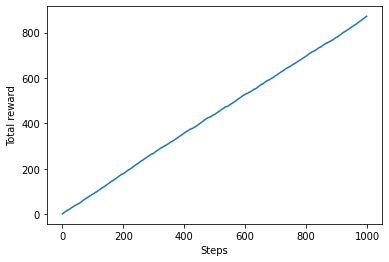

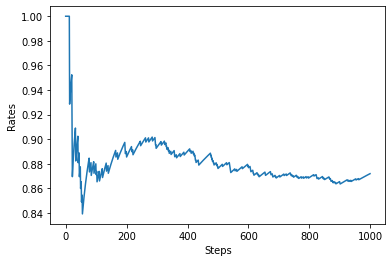

In [12]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  action = agent.get_action()  #①行動を選択
  reward = bandit.play(action) #②実際にプレイした報酬を得る
  agent.update(action, reward) #③行動と報酬から学ぶ
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step+1))

print(total_reward)

# グラフの描画（１）
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# グラフの描画(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

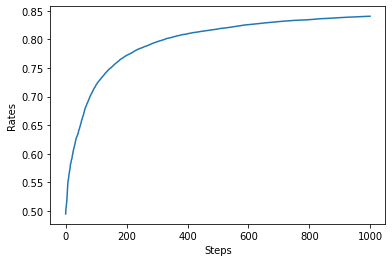

In [13]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
  bandit = Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  total_rewards = []
  rates = []
  
  for step in range(steps):
    action = agent.get_action()  #①行動を選択
    reward = bandit.play(action) #②実際にプレイした報酬を得る
    agent.update(action, reward) #③行動と報酬から学ぶ
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))

  all_rates[run] = rates # ①報酬の結果を記録する
  
avg_rates = np.average(all_rates, axis=0) # ②各ステップにおける平均を求める

# グラフの描画
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

## 1.5 非定常問題
- 定常問題：報酬の確率分布が定常である
- 非定常問題：報酬の確率分布が変動する

In [14]:
# 定常問題
class Bandit:
  def __init__(self, arms=10):
    self.rates = np.random.rand(arms) # 各マシンの勝率

  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [15]:
# 非定常問題
class NonStatBandit:
  def __init__(self, arms=10):
    self.arms = arms
    self.rates = np.random.rand(arms) # 各マシンの勝率

  def play(self, arm):
    rate = self.rates[arm]
    self.rates += 0.1 * np.random.randn(self.arms) # ノイズを追加
    if rate > np.random.rand():
      return 1
    else:
      return 0

### 1.5.1 非定常問題を解くためには
Qn = Qn-1+1/n*(Rn-Qn-1)の1/nをα(0<α<1)に変更  
Qn = Qn-1+α*(Rn-Qn-1)
上記のように変形すると、過去の報酬は指数関数的に減少する。

### 1.5.2 非定常問題を解く

In [16]:
class AlphaAgent:
  def __init__(self, epsilon, alpha, actions=10):
    self.epsilon = epsilon
    self.Qs = np.zeros(actions)
    self.alpha = alpha

  def update(self, action, reward):
    # alphaで更新
    self.Qs[action] += (reward - self.Qs[action]) * self.alpha

  def get_action(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))
    return np.argmax(self.Qs)

956


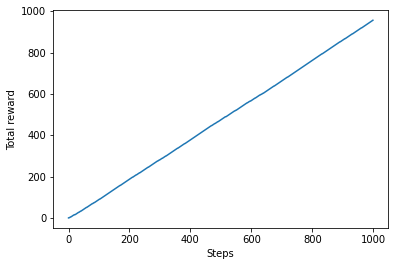

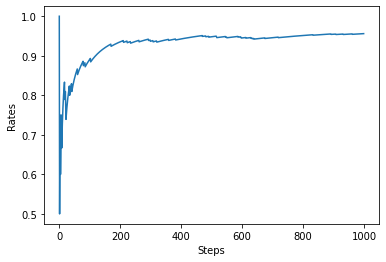

In [17]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1
alpha = 0.8

bandit = NonStatBandit()
agent = AlphaAgent(epsilon, alpha)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
  action = agent.get_action()  #①行動を選択
  reward = bandit.play(action) #②実際にプレイした報酬を得る
  agent.update(action, reward) #③行動と報酬から学ぶ
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step+1))

print(total_reward)

# グラフの描画（１）
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# グラフの描画(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

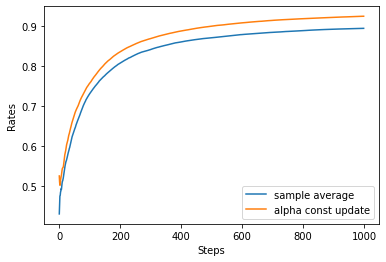

In [18]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for n_alpha in range(2):
  for run in range(runs):
    bandit = NonStatBandit()
    if n_alpha == 0:
      agent = Agent(epsilon)
    else:
      agent = AlphaAgent(epsilon, alpha)

    
    total_reward = 0
    total_rewards = []
    rates = []
    
    for step in range(steps):
      action = agent.get_action()  #①行動を選択
      reward = bandit.play(action) #②実際にプレイした報酬を得る
      agent.update(action, reward) #③行動と報酬から学ぶ
      total_reward += reward

      total_rewards.append(total_reward)
      rates.append(total_reward / (step+1))

    all_rates[run] = rates # ①報酬の結果を記録する
    
  avg_rates = np.average(all_rates, axis=0) # ②各ステップにおける平均を求める

  # グラフの描画
  plt.ylabel('Rates')
  plt.xlabel('Steps')
  plt.plot(avg_rates)
plt.legend(["sample average", "alpha const update"])
plt.show()

# 2章 マルコフ決定過程
エージェントの行動によって環境の状態が変化する問題を考える。  
そのような問題の一部は**マルコフ決定過程**として定式化される。  

## 2.1 MDPとは
- MDP：Mrkov Dicision Process
- 決定過程：エージェントが（環境と相互作用しながら）行動を決定する過程

### 2.1.1 MDPの具体例
- 状態：エージェントの行動により変わるエージェントの状況

### 2.1.2 エージェントと環境のやりとり

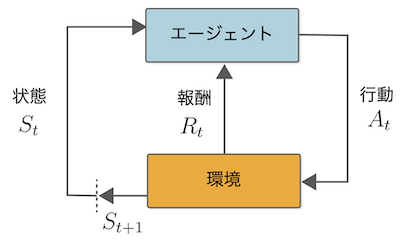

In [19]:
from IPython.display import Image,display_png
display_png(Image('png/MDPのサイクル.png'))

## 2.2 環境とエージェントの定式化
以下の三つを数式により定式化する
- 状態遷移：状態はどのように遷移するのか
- 報酬：報酬はどのように与えられるか
- 方策：エージェントはどのように行動を決定するか

### 2.2.1 状態遷移
決定論的な状態遷移の場合、次の状態s'は状態sと行動aによって一意に決まる。  
s' = f(s, a)  
f(s, a)：状態遷移関数
確率論的な状態遷移の場合、エージェントが状態sで、行動aを行った時、次の状態s'に移動する確率  
p(s'|s, a)：状態遷移確率  

マルコフ性：現在の状態sと行動aだけに依存して、次の状態s'が決まる

### 2.2.2 報酬関数
報酬関数：エージェントが状態sにいて、行動aを行い、次の状態s'になった時に得られる報酬をr(s, a, s')で定義  


### 2.2.3 エージェントの方策
- 決定論的な方策：a=u(s)
- 確率論的な方策：π(a|s)  
ある状態sにいる時に行動aを取る確率

## 2.3 MDPの目標
- 方策π(a|s)によって行動し、
- その行動と状態遷移確率p(s'|s, a)によって次の状態に遷移し、
- 報酬関数r(s, a, s')に従って報酬が与えられる。
最大方策：上記の枠組みの中で、収益が最大となる最適方策を見つける。

## 2.3.1 エピソードタスクと連続タスク
- エピソードタスク：終わりのある問題
- 連続タスク：終わりのない問題

### 2.3.2 収益
収益Gt=Rt0+rRt1+r^2*Rt2+...
r：割引率

### 2.3.3 状態価値関数
収益の期待値：vπ(s)=E[Gt|St=s, π]  
vπ(s)：状態価値関数  
状態s、方策πのときの報酬の期待値


### 2.3.4 最適方策と最適価値関数
v*：最適状態価値関数

## 2.4 MDPの例

# 3章 ベルマン方程式
ベルマン方程式：MDPで成り立つ最も重要な方程式  
「状態sの価値関数」と「その次に取りうる状態s'の価値関数」との関係性を表したもの

## 3.1 ベルマン方程式の導出

## 3.1.1 確率と期待値
p(y|x)：条件付き確率
p(x,y)=p(x)p(y|x)：xとyが同時に起こる確率

### 3.1.2 ベルマン方程式の導出


一回自分で机上で計算した方が良い。

## 3.2 ベルマン方程式の例

### 3.2.1 ２マスのグリッドワールド


### 3.2.2 ベルマン方程式の意義
ベルマン方程式を使えば、ランダムな振る舞いの状態価値関数を求められる。

## 3.3 行動価値関数とベルマン方程式
行動価値関数を導く

### 3.3.1 行動価値関数
状態価値関数  
vπ(s)=Eπ[Gt|St=s]  
行動価値関数：Q関数  
qπ(s,a)=Eπ[Gt|St=s, At=a]  
Q関数は、時刻tの時に状態sで行動aを取り、時刻t+1では方策πに従った行動を取る。

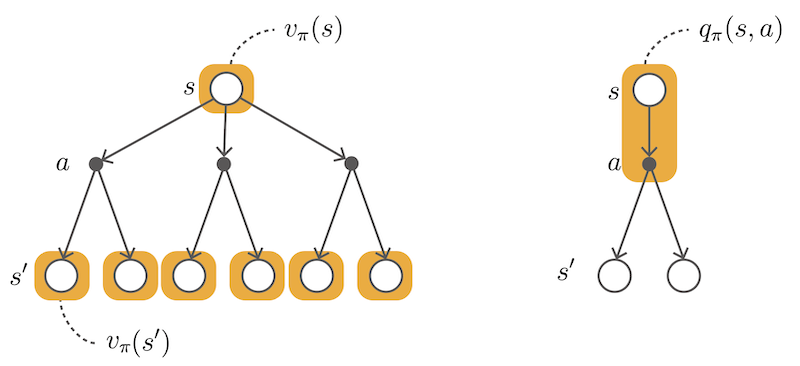

In [20]:
from IPython.display import Image,display_png
display_png(Image('png/状態価値関数とQ関数.png'))

### 3.3.2 行動価値関数を使ったベルマン方程式


## 3.4 ベルマン最適方程式
最適方策：すべての状態において、状態価値関数が最大となる方策  

### 3.4.1 状態価値関数におけるベルマン最適方程式

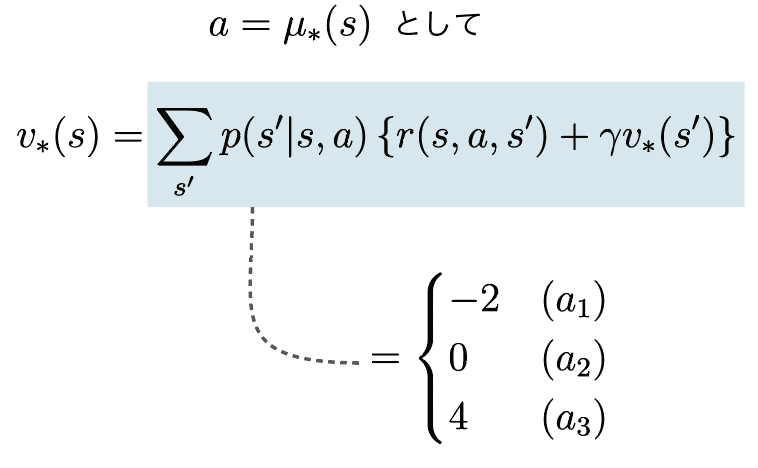

In [21]:
from IPython.display import Image,display_png
display_png(Image('png/最適方策の価値関数.png'))

ベルマン最適方程式：上式の青枠が最大値を取る行動を取ったとき価値

### 3.4.2 Q関数におけるベルマン最適方程式
Q関数におけるベルマン最適方程式を示す。

## 3.5 ベルマン最適方程式の例

### 3.5.1 ベルマン最適方程式の適用

### 3.5.2 最適方策を得る

## 3.6 まとめ
以下の三式が重要
- ベルマン方程式
- ベルマン最適方程式
- 最適方策

#  4章 動的計画法
ベルマン方程式を用いれば、連立方程式が立ち、それを解けば価値関数が求まる。

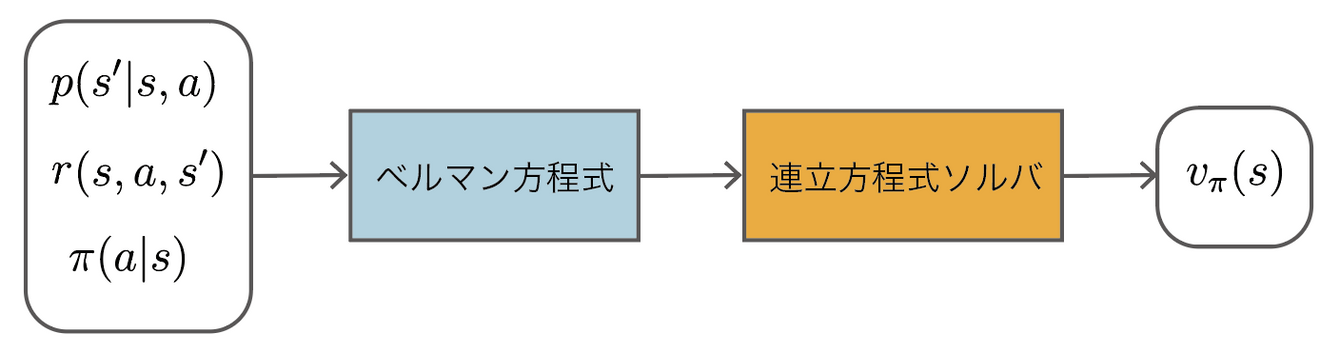

In [22]:
from IPython.display import Image,display_png
display_png(Image('png/ベルマン方程式を使って価値関数を求める流れ.png'))

上記の流れで解けるのは、小さな問題のみ。  
→動的計画法を用いる。

## 4.1 動的計画法と方策評価
- 方策強化：ある方策πが与えられた時に、その方策の価値関数vπ(s)やqπ(s,a)を求めること
- 方策制御：方策を制御して最適方策へと調整する

## 4.1.1 動的計画法の概要
- ベルマン方程式：「状態sの価値関数」と「その次に取りうる状態s'の価値関数」との関係性を表したもの
ベルマン方程式を更新式へ変換する。  
- Vk：次に取りうる状態の価値関数
- Vk+1：今いる状態の価値関数
を更新する式となる。  
*なんで更新式に変形できるか分からない。*
- ブートストラップ：「推定式：Vk(s')」を使って、「別の推定値V(k+1)」を改善するプロセス

V0(s)→V1(s)→V2(s)...を繰り返し更新すると、最終的なゴールVπ(s)に近づく。

**動的計画法**
- アルゴリズムの総称
- 対象とする問題を小さな問題に分割して答えを求める手法一般を指す。
- エッセンスは「同じ計算を2度としないこと」
- 実現方法は、「トップダウン方式」、「ボトムアップ方式」
- トップダウン方式：メモ化
- ボトムアップ方式：一つずつ繰り上げる

## 4.1.2 反復方策評価を試す

In [23]:
V = {'L1':0.0, 'L2':0.0}
new_V = V.copy()

for _ in range(100):
  new_V['L1'] = 0.5*(-1+0.9*V['L1'])+0.5*( 1+0.9*V['L2'])
  new_V['L2'] = 0.5*(0 +0.9*V['L1'])+0.5*(-1+0.9*V['L2'])
  V = new_V.copy()
  #print(V)

In [24]:
V = {'L1':0.0, 'L2':0.0}
new_V = V.copy()

cnt = 0 #何回更新したかを記録
while True:
  new_V['L1'] = 0.5*(-1+0.9*V['L1'])+0.5*( 1+0.9*V['L2'])
  new_V['L2'] = 0.5*(0 +0.9*V['L1'])+0.5*(-1+0.9*V['L2'])

  #更新された量の最大値
  delta = abs(new_V['L1'] - V['L1'])
  delta = max(delta, abs(new_V['L2'] - V['L2']))
  V = new_V.copy()
  #print(delta)
  cnt += 1
  if delta < 0.0001:
    print(V)
    print(cnt)
    break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
76


### 4.1.3 反復方策評価の別の実装方法
各要素を上書きする方法

In [25]:
V = {'L1':0.0, 'L2':0.0}
new_V = V.copy()

cnt = 0 #何回更新したかを記録
while True:
  t = 0.5*(-1+0.9*V['L1'])+0.5*( 1+0.9*V['L2'])
  delta = abs(t - V['L1'])
  V['L1'] = t

  t = 0.5*(0 +0.9*V['L1'])+0.5*(-1+0.9*V['L2'])
  delta = max(delta, abs(t - V['L2']))
  V['L2'] = t

  cnt += 1
  if delta < 0.0001:
    print(V)
    print(cnt)
    break

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
60


## 4.2 より大きな問題へ

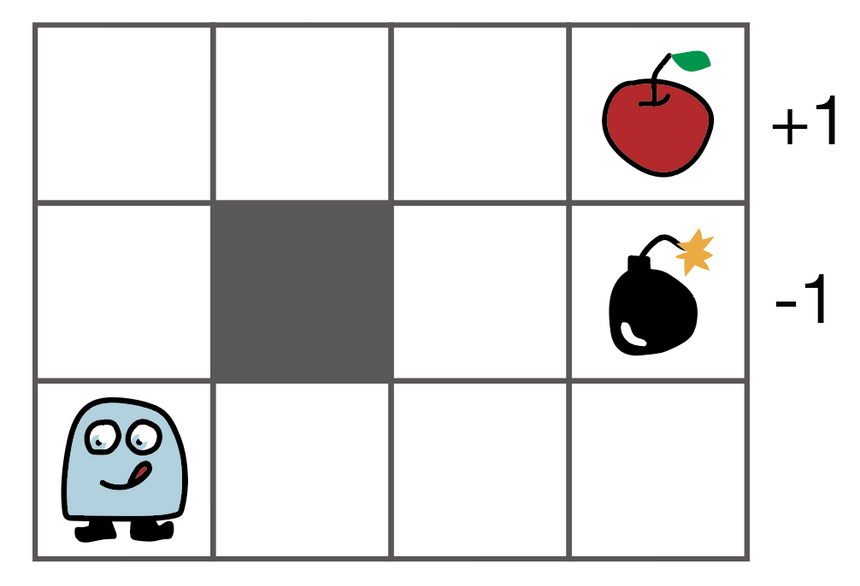

In [26]:
from IPython.display import Image,display_png
display_png(Image('png/3X4のグリッドワールド.png'))

In [27]:
!ls

ch01  ch05  ch07  ch09	  LICENSE.md  png      README.md
ch04  ch06  ch08  common  notebooks   pytorch


### 4.2.1 GridWorldクラスの実装

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


class Renderer:
    def __init__(self, reward_map, goal_state, wall_state):
        self.reward_map = reward_map
        self.goal_state = goal_state
        self.wall_state = wall_state
        self.ys = len(self.reward_map)
        self.xs = len(self.reward_map[0])

        self.ax = None
        self.fig = None
        self.first_flg = True

    def set_figure(self, figsize=None):
        fig = plt.figure(figsize=figsize)
        self.ax = fig.add_subplot(111)
        ax = self.ax
        ax.clear()
        ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.set_xticks(range(self.xs))
        ax.set_yticks(range(self.ys))
        ax.set_xlim(0, self.xs)
        ax.set_ylim(0, self.ys)
        ax.grid(True)

    def render_v(self, v=None, policy=None, print_value=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax

        if v is not None:
            color_list = ['red', 'white', 'green']
            cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
                'colormap_name', color_list)

            # dict -> ndarray
            v_dict = v
            v = np.zeros(self.reward_map.shape)
            for state, value in v_dict.items():
                v[state] = value

            vmax, vmin = v.max(), v.min()
            vmax = max(vmax, abs(vmin))
            vmin = -1 * vmax
            vmax = 1 if vmax < 1 else vmax
            vmin = -1 if vmin > -1 else vmin

            ax.pcolormesh(np.flipud(v), cmap=cmap, vmin=vmin, vmax=vmax)

        for y in range(ys):
            for x in range(xs):
                state = (y, x)
                r = self.reward_map[y, x]
                if r != 0 and r is not None:
                    txt = 'R ' + str(r)
                    if state == self.goal_state:
                        txt = txt + ' (GOAL)'
                    ax.text(x+.1, ys-y-0.9, txt)

                if (v is not None) and state != self.wall_state:
                    if print_value:
                        offsets = [(0.4, -0.15), (-0.15, -0.3)]
                        key = 0
                        if v.shape[0] > 7: key = 1
                        offset = offsets[key]
                        ax.text(x+offset[0], ys-y+offset[1], "{:12.2f}".format(v[y, x]))

                if policy is not None and state != self.wall_state:
                    actions = policy[state]
                    max_actions = [kv[0] for kv in actions.items() if kv[1] == max(actions.values())]

                    arrows = ["↑", "↓", "←", "→"]
                    offsets = [(0, 0.1), (0, -0.1), (-0.1, 0), (0.1, 0)]
                    for action in max_actions:
                        arrow = arrows[action]
                        offset = offsets[action]
                        if state == self.goal_state:
                            continue
                        ax.text(x+0.45+offset[0], ys-y-0.5+offset[1], arrow)

                if state == self.wall_state:
                    ax.add_patch(plt.Rectangle((x,ys-y-1), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
        plt.show()

    def render_q(self, q, show_greedy_policy=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax
        action_space = [0, 1, 2, 3]

        qmax, qmin = max(q.values()), min(q.values())
        qmax = max(qmax, abs(qmin))
        qmin = -1 * qmax
        qmax = 1 if qmax < 1 else qmax
        qmin = -1 if qmin > -1 else qmin


        color_list = ['red', 'white', 'green']
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
            'colormap_name', color_list)

        for y in range(ys):
            for x in range(xs):
                for action in action_space:
                    state = (y, x)
                    r = self.reward_map[y, x]
                    if r != 0 and r is not None:
                        txt = 'R ' + str(r)
                        if state == self.goal_state:
                            txt = txt + ' (GOAL)'
                        ax.text(x+.05, ys-y-0.95, txt)

                    if state == self.goal_state:
                        continue

                    tx, ty = x, ys-y-1

                    action_map = {
                        0: ((0.5+tx, 0.5+ty), (tx+1, ty+1), (tx, ty+1)),
                        1: ((tx, ty), (tx+1, ty), (tx+0.5, ty+0.5)),
                        2: ((tx, ty), (tx+0.5, ty+0.5), (tx, ty+1)),
                        3: ((0.5+tx, 0.5+ty), (tx+1, ty), (tx+1, ty+1)),
                    }
                    offset_map = {
                        0: (0.1, 0.8),
                        1: (0.1, 0.1),
                        2: (-0.2, 0.4),
                        3: (0.4, 0.4),
                    }
                    if state == self.wall_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
                    elif state in self.goal_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0., 1., 0., 1.)))
                    else:

                        tq = q[(state, action)]
                        color_scale = 0.5 + (tq / qmax) / 2  # normalize: 0.0-1.0

                        poly = plt.Polygon(action_map[action],fc=cmap(color_scale))
                        ax.add_patch(poly)

                        offset= offset_map[action]
                        ax.text(tx+offset[0], ty+offset[1], "{:12.2f}".format(tq))
        plt.show()

        if show_greedy_policy:
            policy = {}
            for y in range(self.ys):
                for x in range(self.xs):
                    state = (y, x)
                    qs = [q[state, action] for action in range(4)]  # action_size
                    max_action = np.argmax(qs)
                    probs = {0:0.0, 1:0.0, 2:0.0, 3:0.0}
                    probs[max_action] = 1
                    policy[state] = probs
            self.render_v(None, policy)

In [29]:
import numpy as np


class GridWorld:
  def __init__(self):
    self.action_space = [0, 1, 2, 3]
    self.action_meaning = {
        0:"UP",
        1:"DOWN",
        2:"LEFT",
        3:"RIGHT"
    }

    self.reward_map = np.array(
        [[0, 0, 0, 1],
         [0, None, 0, -1],
         [0,0,0,0]]
    )
    self.goal_state = (0, 3)
    self.wall_state = (1, 1)
    self.start_state = (2, 0)
    self.agent_state = self.start_state

  @property #インスタンス変数として使用できる
  def height(self):
    return len(self.reward_map)

  @property
  def width(self):
    return len(self.reward_map[0])

  @property
  def shape(self):
    return self.reward_map.shape

  @property
  def actions(self):
    return self.action_space

  def states(self):
    for h in range(self.height):
      for w in range(self.width):
        yield (h, w) #関数を一時停止して別の処理に移る
  
  def next_state(self, state, action):
    #①移動先の場所の計算
    action_move_map = [(-1,0),(1,0),(0,-1),(0,1)]
    move = action_move_map[action]
    next_state = (state[0]+move[0], state[1]+move[1])
    ny, nx = next_state

    #②移動先がグリッドワールドの枠の外か、それとも移動先が壁か？
    if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
      next_state = state
    elif next_state == self.wall_state:
      next_state = state

    return next_state

  def reward(self, state, action, next_state):
    return self.reward_map[next_state]

  def render_v(self, v=None, policy=None, print_value=True):
    renderer = Renderer(self.reward_map, self.goal_state,
                                      self.wall_state)
    renderer.render_v(v, policy, print_value)

  def render_q(self, q=None, print_value=True):
      renderer = Renderer(self.reward_map, self.goal_state,
                                        self.wall_state)
      renderer.render_q(q, print_value)

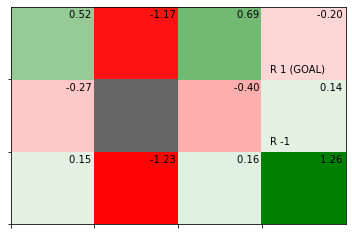

In [30]:
env = GridWorld()
V = {}
for state in env.states():
  V[state] = np.random.randn() #ダミーの状態価値関数
env.render_v(V)

### 4.2.2 defaultdictの使い方

In [33]:
env = GridWorld()
V = {}

# ディクショナリの要素の初期化
for state in env.states():
  V[state] = 0

state = (1,2)
print(V[state])

0
